$Z(x,y) = \sin{x} \cos{y}$

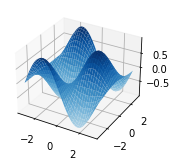

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import math

from matplotlib import cm

plt.style.use('_mpl-gallery')

# Make data
X = np.arange(-np.pi, np.pi, 0.1)
Y = np.arange(-np.pi, np.pi, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)*np.cos(Y)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

plt.show()

In [19]:
NT = np.product(X.shape)

data = {
    "x": np.reshape(X,NT),
    "y": np.reshape(Y,NT),
    "z": np.reshape(Z,NT)
}
df = pd.DataFrame(data=data)

df

,x,y,z
0,-3.141593,-3.141593,1.224647e-16
1,-3.041593,-3.141593,9.983342e-02
2,-2.941593,-3.141593,1.986693e-01
3,-2.841593,-3.141593,2.955202e-01
4,-2.741593,-3.141593,3.894183e-01
...,...,...,...
3964,2.658407,3.058407,-4.629956e-01
3965,2.758407,3.058407,-3.725838e-01
3966,2.858407,3.058407,-2.784493e-01
3967,2.958407,3.058407,-1.815326e-01


In [22]:
X = df[['x','y']]
Y = df['z']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2778 1191


In [23]:
#{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100, 50, 30), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
regr = MLPRegressor(
    #activation="tanh",
    #alpha=0.05,
    hidden_layer_sizes=(100, 50)
    #learning_rate="constant",
    #max_iter=100,
    #solver="adam"
).fit(X_train, Y_train)
regr.predict(X_test)
regr.score(X_test, Y_test)

0.9922379296623342

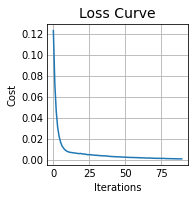

In [24]:
plt.plot(regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [38]:
def eval(x,y):
    return regr.predict([[x, y]])

In [41]:
veval = np.vectorize(eval)

In [43]:
import warnings
warnings.filterwarnings("ignore")
Z_predict = veval(X,Y)

### Строим график предсказанных значений

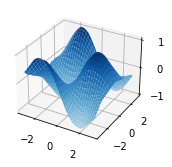

In [49]:
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z_predict, vmin=Z_predict.min() * 2, cmap=cm.Blues)

plt.show()